In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
desempenhos = pd.read_csv('compara_modelos.csv', sep=';')

In [3]:
desempenhos

,n_amostra,features,naive_bayes,svm,random_forest
0,500,1703,0.5483,0.6765,0.6765
1,1000,2425,0.4569,0.7038,0.7006
2,1500,3080,0.5970,0.7019,0.7054
3,2000,3548,0.5739,0.7072,0.7104
4,2500,3966,0.5468,0.7043,0.7069
5,3000,4351,0.5548,0.6958,0.6922
6,3500,4788,0.6588,0.7033,0.7123
7,4000,5089,0.6080,0.7070,0.7116
8,4500,5358,0.4975,0.7065,0.6988
9,5000,5728,0.5561,0.7087,0.7108


In [4]:
desempenhos.corr()

,n_amostra,features,naive_bayes,svm,random_forest
n_amostra,1.000000,0.988036,0.332056,0.651980,0.456918
features,0.988036,1.000000,0.373046,0.710256,0.544736
naive_bayes,0.332056,0.373046,1.000000,0.139731,0.406914
svm,0.651980,0.710256,0.139731,1.000000,0.879349
random_forest,0.456918,0.544736,0.406914,0.879349,1.000000


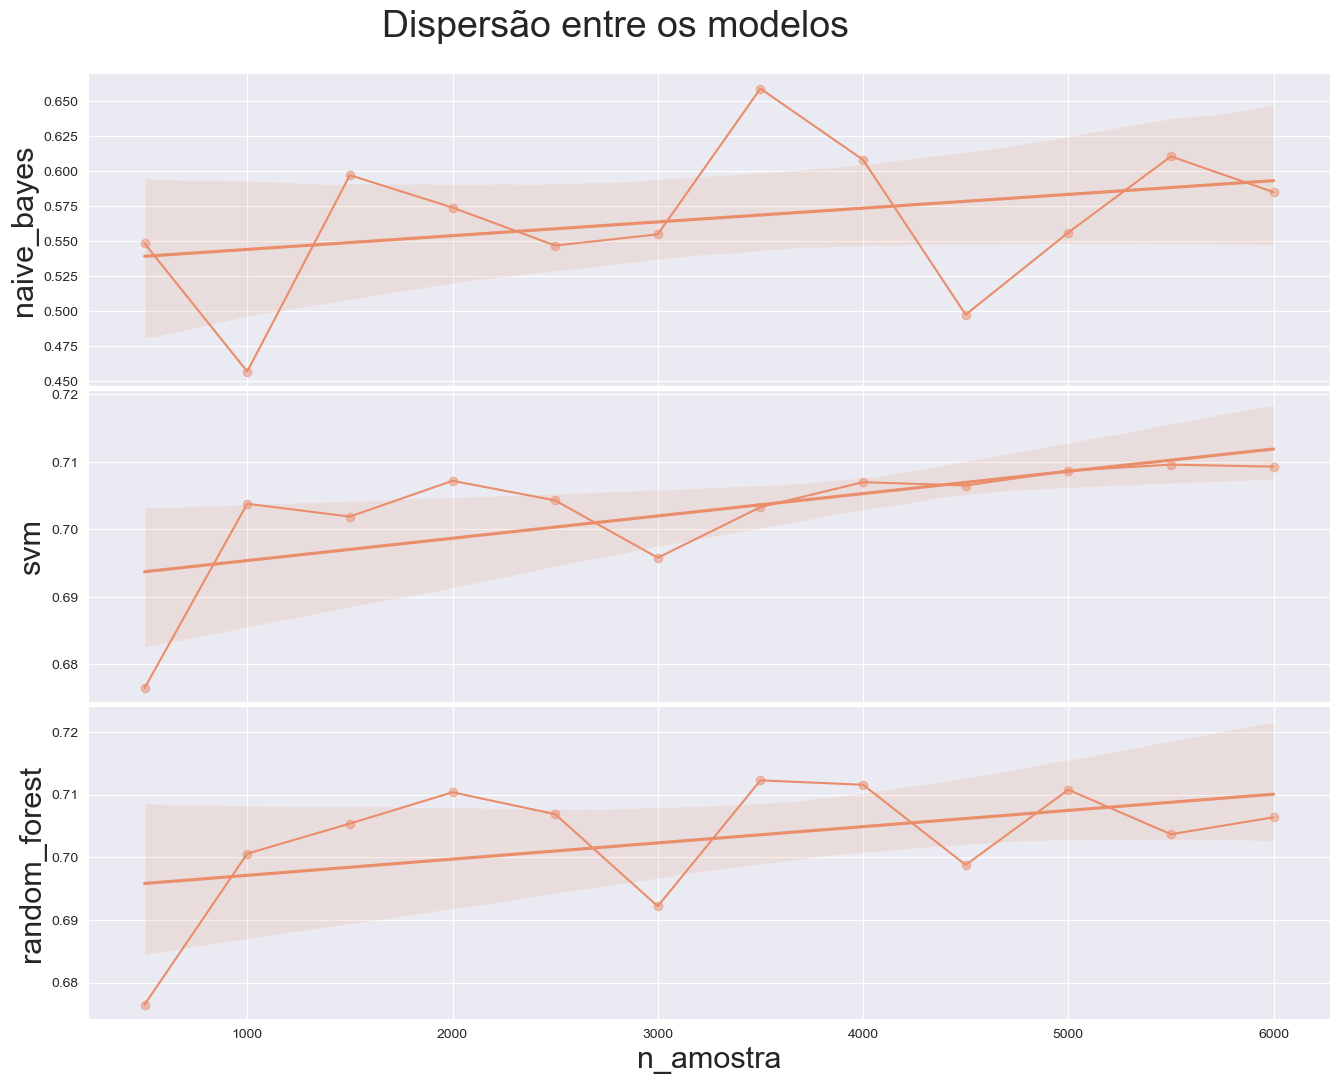

In [6]:
x = 'n_amostra'
y_vars = ['naive_bayes', 'svm', 'random_forest']
sns.set_palette('flare')
ax = sns.pairplot(desempenhos, y_vars=y_vars, x_vars=[x], kind='reg', height=5, 
                  plot_kws={'scatter_kws': {'alpha': 0.5}})
ax.axes[-1, 0].xaxis.label.set_fontsize(22)
for i, y_var in enumerate(y_vars):
    # ax.axes[0,0].xaxis.label.set_fontsize(14)
    ax.axes[i,0].yaxis.label.set_fontsize(22)
for i, y_var in enumerate(y_vars):
    sns.lineplot(data=desempenhos, x=x, y=y_var, ax=ax.axes[i, 0])
ax.fig.set_size_inches(15, 10)
ax.fig.suptitle('Dispersão entre os modelos', fontsize=27, y=1.05)
ax=ax

In [7]:
y = desempenhos['n_amostra']
for coluna in ['naive_bayes', 'svm', 'random_forest']:
    x = desempenhos[coluna]
    x = x.values.reshape(-1, 1)
    modelo = LinearRegression()
    modelo.fit(x, y)
    y_pred = modelo.predict(x)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"Para {coluna}:")
    print(f"MSE: {mse}")
    print(f"R²: {r2}")
    print('')

Para naive_bayes:
MSE: 2650681.1689914423
R²: 0.11026086635252286

Para svm:
MSE: 1712790.4820458114
R²: 0.4250773207118955

Para random_forest:
MSE: 2357192.8331268127
R²: 0.2087744336357552



In [8]:
x1 = desempenhos['svm'].values.reshape(-1, 1)
y = desempenhos['n_amostra'].values
model = LinearRegression()
model.fit(x1, y)
y_pred = model.predict(x1)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("Erro Quadrático Médio (MSE):", mse)
print("Coeficiente de Determinação (R²):", r2)

Erro Quadrático Médio (MSE): 1712790.4820458114
Coeficiente de Determinação (R²): 0.4250773207118955


In [9]:
x1_estimativa = np.array([[0.95]])
y_estimado = model.predict(x1_estimativa)
y_estimado = int(y_estimado)
print("Estimativa de y:", y_estimado)

Estimativa de y: 35035
